In [1]:
# Imports
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Command line
# run these to download the 8 datafiles first

# $ python dl.py BTCUSDT 2024-11-01 2024-11-03 data bybit 5 spot
# $ python dl.py ETHUSDT 2024-11-01 2024-11-03 data bybit 5 spot
# $ python dl.py BTCUSDT 2024-11-01 2024-11-03 data bybit 5 linear
# $ python dl.py ETHUSDT 2024-11-01 2024-11-03 data bybit 5 linear

# $ python dl.py BTCUSDT 2024-11-01 2024-11-03 data binance 5m spot
# $ python dl.py ETHUSDT 2024-11-01 2024-11-03 data binance 5m spot
# $ python dl.py BTCUSDT 2024-11-01 2024-11-03 data binance 5m futures --type=um
# $ python dl.py ETHUSDT 2024-11-01 2024-11-03 data binance 5m futures --type=um

## Binance Exchange

### ETH

In [2]:
# Futures
filepath = 'binance-futures-ETHUSDT-5m.csv'
ethusd_binance_futures = pd.read_csv(filepath, index_col='time')
ethusd_binance_futures.index = pd.to_datetime(ethusd_binance_futures.index, unit='ms')
ethusd_binance_futures['LogClose'] = np.log(ethusd_binance_futures['close'])

# Spot
filepath = 'binance-spot-ETHUSDT-5m.csv'
ethusd_binance_spot = pd.read_csv(filepath, index_col='time')
ethusd_binance_spot.index = pd.to_datetime(ethusd_binance_spot.index, unit='ms')
ethusd_binance_spot['LogClose'] = np.log(ethusd_binance_spot['close'])

In [5]:
ethusd_binance_logbasis = ethusd_binance_futures['LogClose'] - ethusd_binance_spot['LogClose']
ethusd_binance_basis = ethusd_binance_futures['close'] - ethusd_binance_spot['close']

# ethusd_binance_basis.plot(title='Binance ETHUSD Basis')
# plt.show()

In [87]:
# ethusd_binance_logbasis.plot(title='Binance ETHUSD LogBasis')
# plt.show()

### BTC

In [6]:
# Futures
filepath = 'binance-futures-BTCUSDT-5m.csv'
btcusd_binance_futures = pd.read_csv(filepath, index_col='time')
btcusd_binance_futures.index = pd.to_datetime(btcusd_binance_futures.index, unit='ms')
btcusd_binance_futures['LogClose'] = np.log(btcusd_binance_futures['close'])

# Spot
filepath = 'binance-spot-BTCUSDT-5m.csv'
btcusd_binance_spot = pd.read_csv(filepath, index_col='time')
btcusd_binance_spot.index = pd.to_datetime(btcusd_binance_spot.index, unit='ms')
btcusd_binance_spot['LogClose'] = np.log(btcusd_binance_spot['close'])

In [7]:
btcusd_binance_logbasis = btcusd_binance_futures['LogClose'] - btcusd_binance_spot['LogClose']
btcusd_binance_basis = btcusd_binance_futures['close'] - btcusd_binance_spot['close']

# btcusd_binance_basis.plot(title='Binance BTCUSD Basis')
# plt.show()

In [90]:
# btcusd_binance_logbasis.plot(title='Binance BTCUSD LogBasis')
# plt.show()

## Bybit Exchange

### ETH

In [8]:
# Futures
filepath = 'bybit-linear-ETHUSDT-5.csv'
ethusd_bybit_futures = pd.read_csv(filepath, index_col='time')
ethusd_bybit_futures.index = pd.to_datetime(ethusd_bybit_futures.index, unit='ms')
ethusd_bybit_futures['LogClose'] = np.log(ethusd_bybit_futures['close'])

# Spot
filepath = 'bybit-spot-ETHUSDT-5.csv'
ethusd_bybit_spot = pd.read_csv(filepath, index_col='time')
ethusd_bybit_spot.index = pd.to_datetime(ethusd_bybit_spot.index, unit='ms')
ethusd_bybit_spot['LogClose'] = np.log(ethusd_bybit_spot['close'])

In [9]:
ethusd_bybit_logbasis = ethusd_bybit_futures['LogClose'] - ethusd_bybit_spot['LogClose']
ethusd_bybit_basis = ethusd_bybit_futures['close'] - ethusd_bybit_spot['close']

# ethusd_bybit_basis.plot(title='Bybit ETHUSD Basis')
# plt.show()

In [93]:
# ethusd_bybit_logbasis.plot(title='Bybit ETHUSD LogBasis')
# plt.show()

### BTC

In [10]:
# Futures
filepath = 'bybit-linear-BTCUSDT-5.csv'
btcusd_bybit_futures = pd.read_csv(filepath, index_col='time')
btcusd_bybit_futures.index = pd.to_datetime(btcusd_bybit_futures.index, unit='ms')
btcusd_bybit_futures['LogClose'] = np.log(btcusd_bybit_futures['close'])

# Spot
filepath = 'bybit-spot-BTCUSDT-5.csv'
btcusd_bybit_spot = pd.read_csv(filepath, index_col='time')
btcusd_bybit_spot.index = pd.to_datetime(btcusd_bybit_spot.index, unit='ms')
btcusd_bybit_spot['LogClose'] = np.log(btcusd_bybit_spot['close'])

In [11]:
btcusd_bybit_logbasis = btcusd_bybit_futures['LogClose'] - btcusd_bybit_spot['LogClose']
btcusd_bybit_basis = btcusd_bybit_futures['close'] - btcusd_bybit_spot['close']

# btcusd_bybit_basis.plot(title='Bybit BTCUSD Basis')
# plt.show()

In [96]:
# btcusd_bybit_logbasis.plot(title='Bybit BTCUSD LogBasis')
# plt.show()

## Compare between exchanges
### BTC

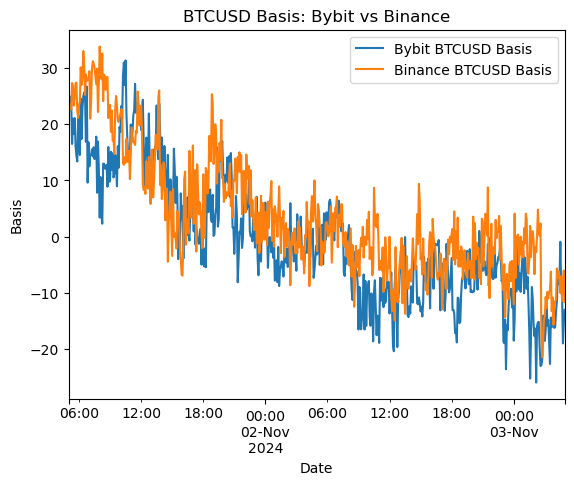

In [12]:
# BTCUSD Basis
btcusd_bybit_basis.plot(label='Bybit BTCUSD Basis')
btcusd_binance_basis.plot(label='Binance BTCUSD Basis')

plt.title('BTCUSD Basis: Bybit vs Binance')
plt.xlabel('Date')
plt.ylabel('Basis')
plt.legend()
plt.show()

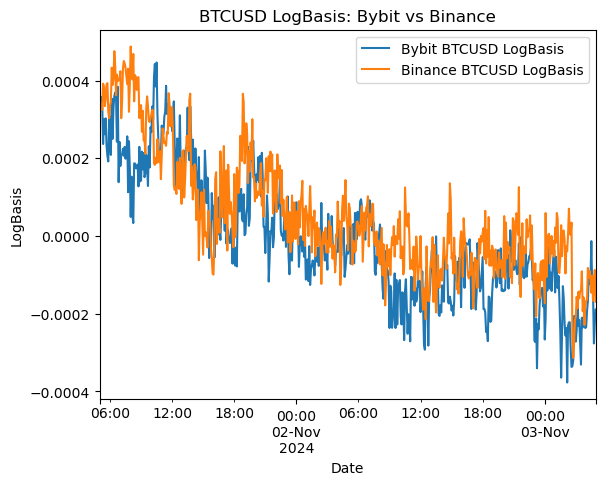

In [13]:
# BTCUSD LogBasis
btcusd_bybit_logbasis.plot(label='Bybit BTCUSD LogBasis')
btcusd_binance_logbasis.plot(label='Binance BTCUSD LogBasis')

plt.title('BTCUSD LogBasis: Bybit vs Binance')
plt.xlabel('Date')
plt.ylabel('LogBasis')
plt.legend()
plt.show()

### ETH

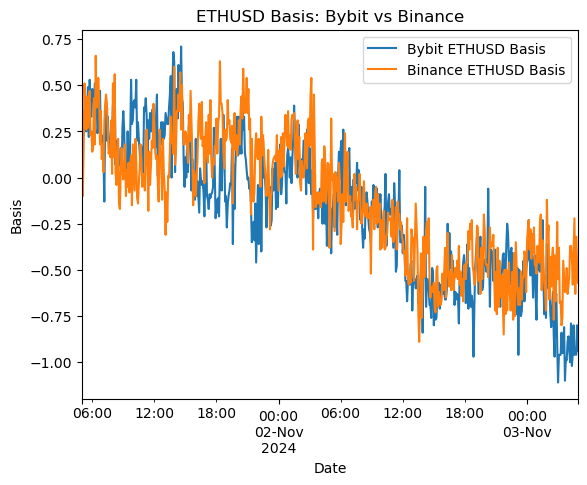

In [14]:
# ETHUSD Basis
ethusd_bybit_basis.plot(label='Bybit ETHUSD Basis')
ethusd_binance_basis.plot(label='Binance ETHUSD Basis')

plt.title('ETHUSD Basis: Bybit vs Binance')
plt.xlabel('Date')
plt.ylabel('Basis')
plt.legend()
plt.show()

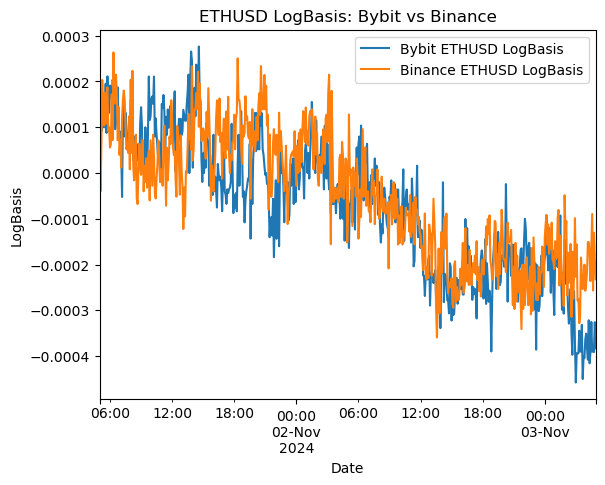

In [15]:
# ETHUSD LogBasis
ethusd_bybit_logbasis.plot(label='Bybit ETHUSD LogBasis')
ethusd_binance_logbasis.plot(label='Binance ETHUSD LogBasis')

plt.title('ETHUSD LogBasis: Bybit vs Binance')
plt.xlabel('Date')
plt.ylabel('LogBasis')
plt.legend()
plt.show()

# Research pt2 code


Analysis for ETHUSD Binance market:


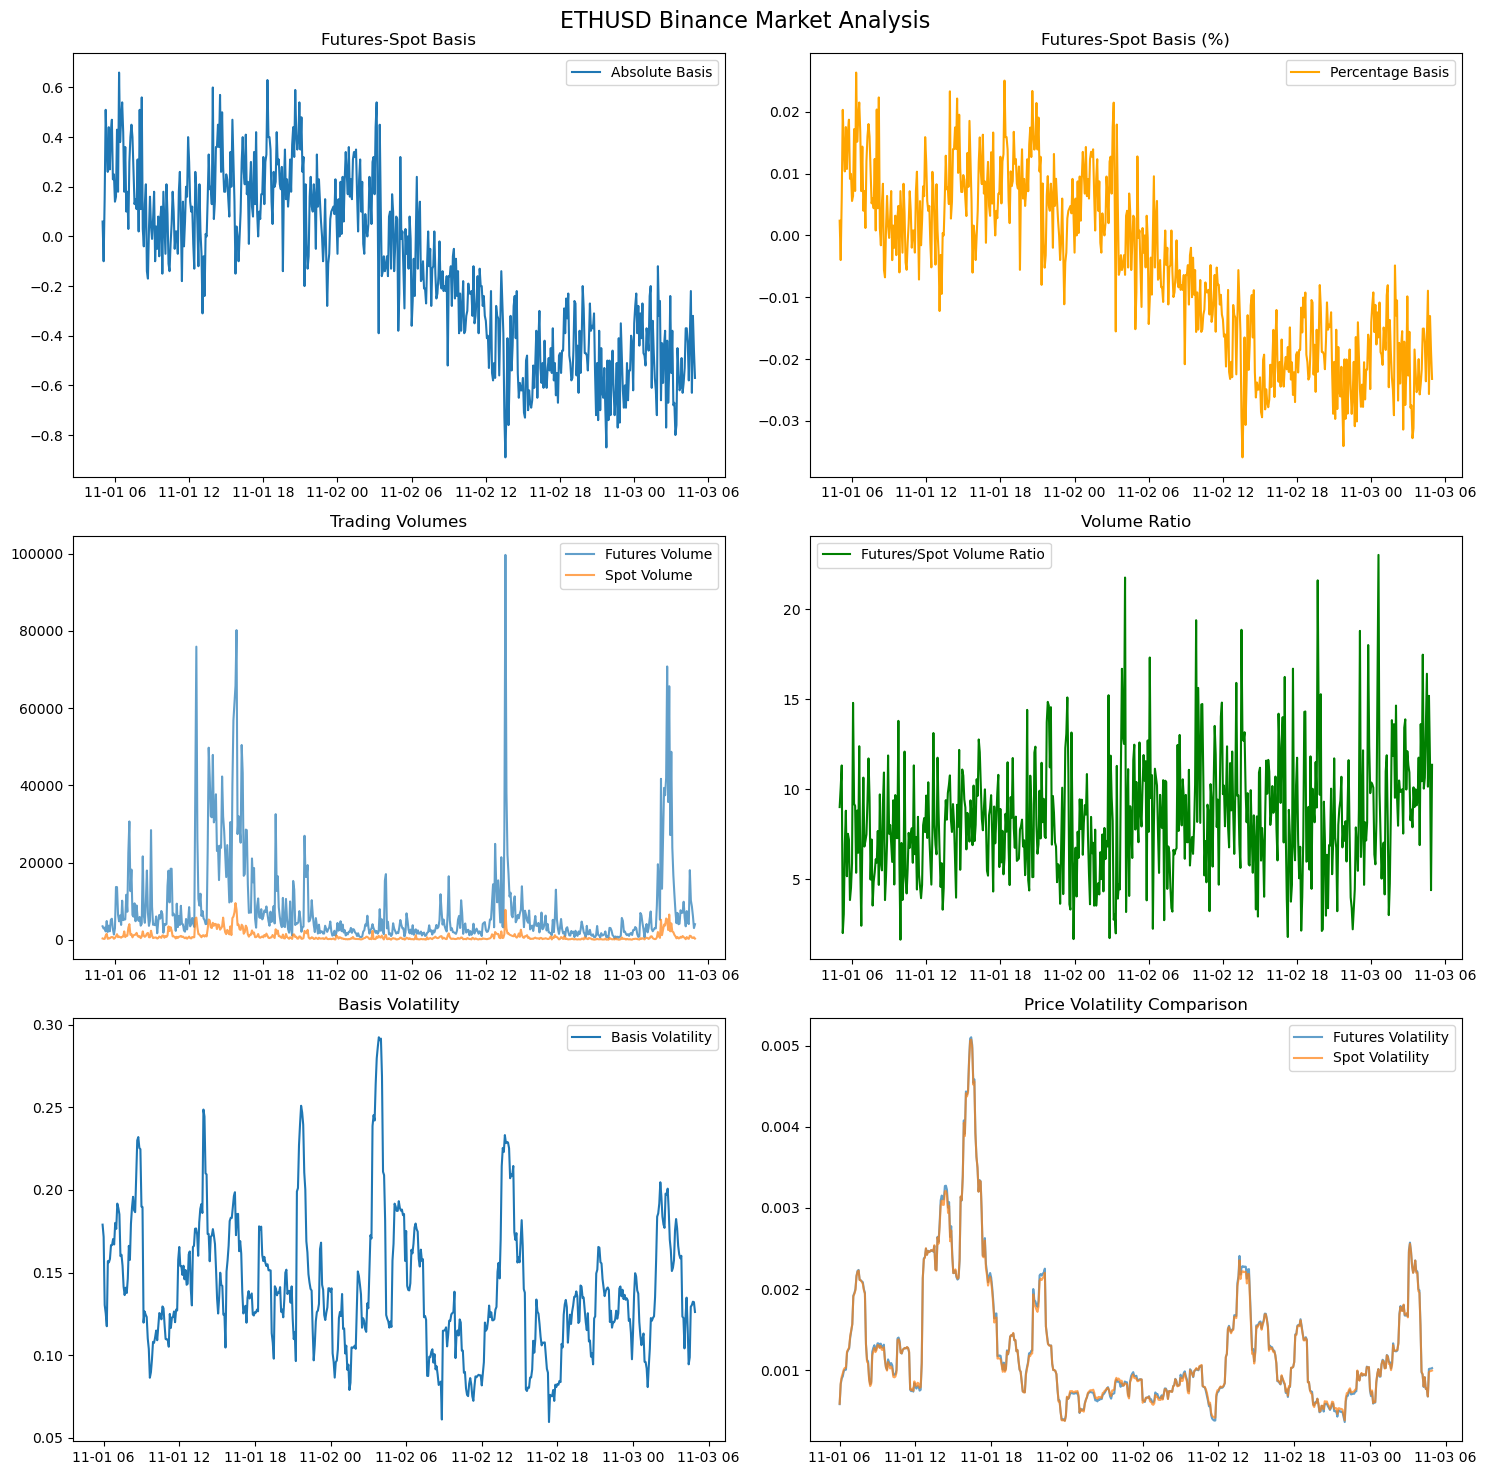


Summary Statistics:
mean_basis: -0.1212
std_basis: 0.3435
max_basis: 0.6600
min_basis: -0.8900
mean_basis_pct: -0.0049
mean_volume_ratio: 8.3949
correlation_volumes: 0.9391
correlation_volatilities: 0.9996

Basis Mean Reversion Test:
Coefficient: -0.1464
P-value: 0.0000

Percentage of potential arbitrage opportunities: 4.34%

Analysis for BTCUSD Binance market:


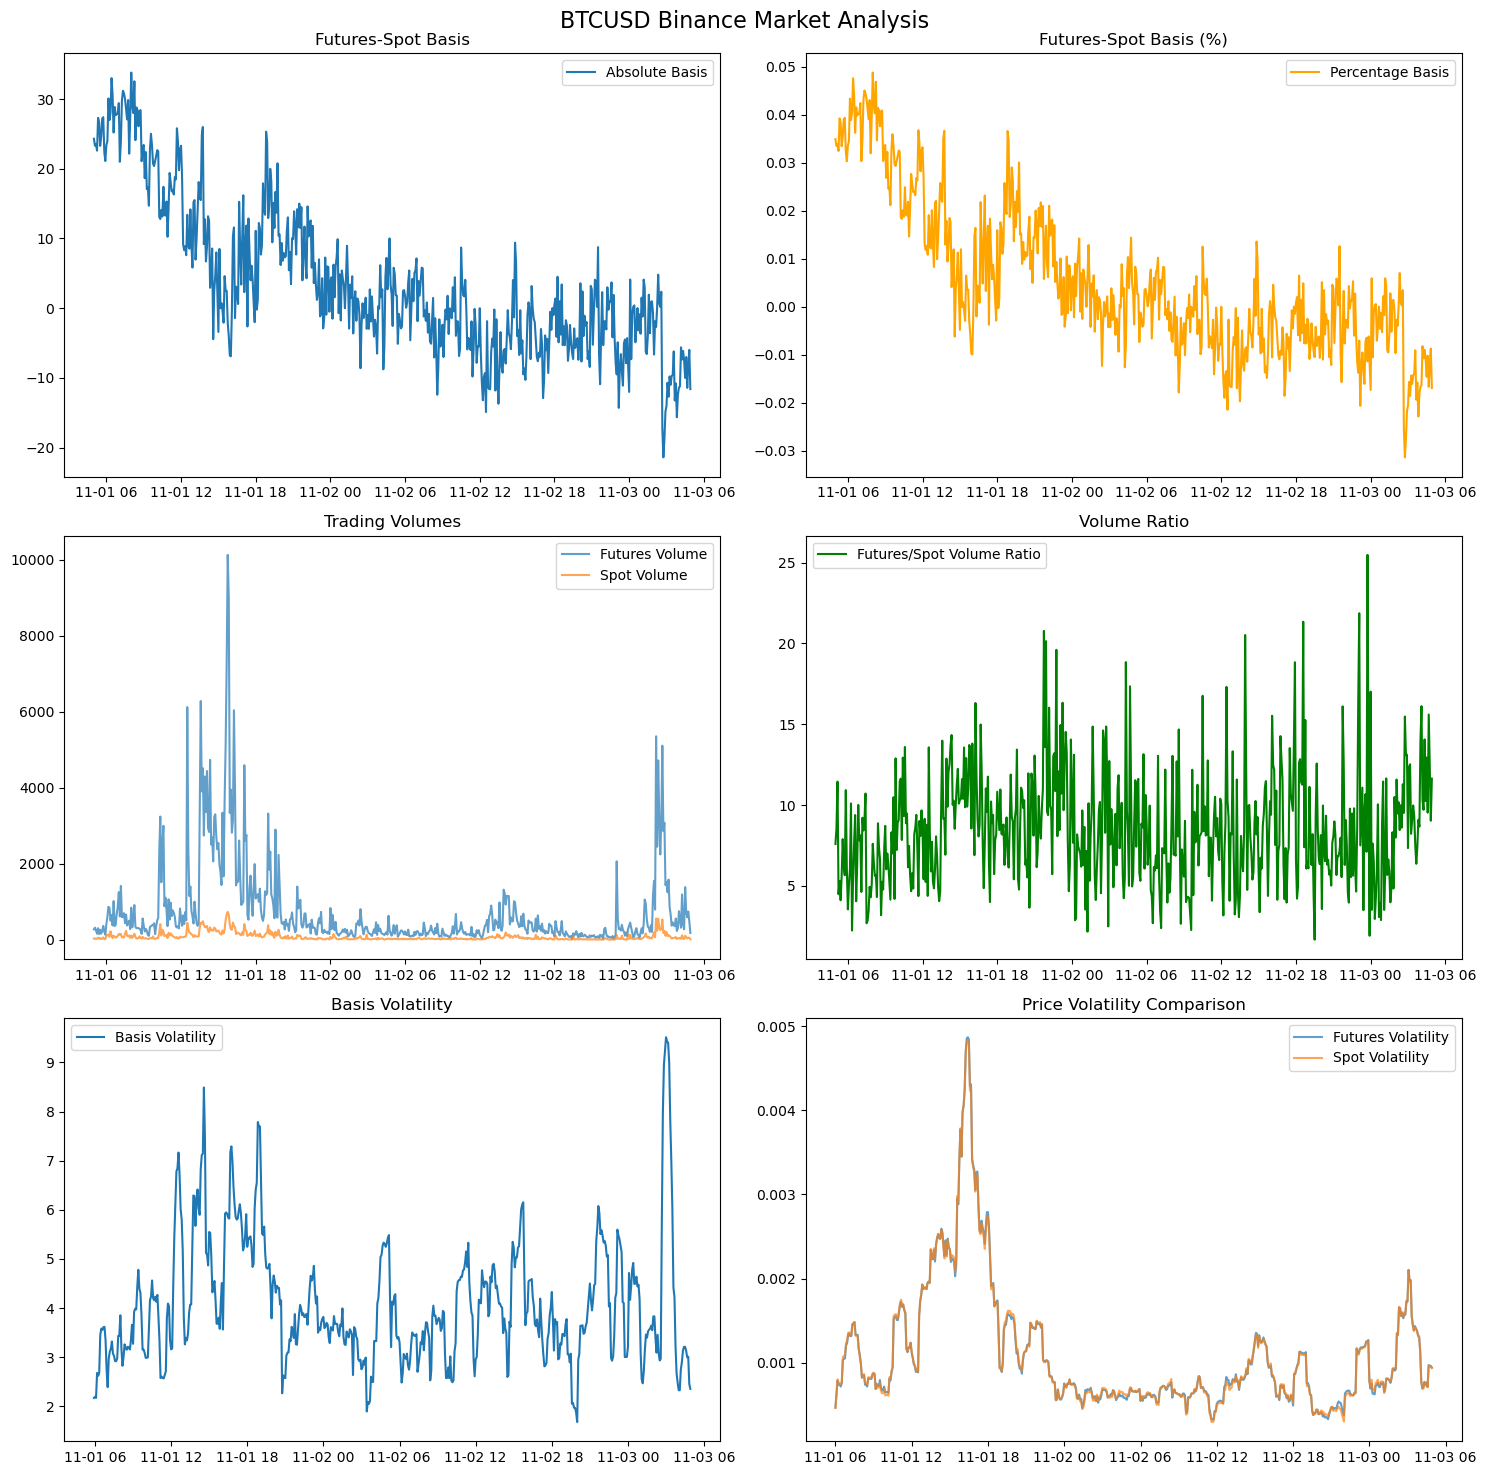


Summary Statistics:
mean_basis: 3.7910
std_basis: 10.9326
max_basis: 33.8000
min_basis: -21.4000
mean_basis_pct: 0.0054
mean_volume_ratio: 8.5514
correlation_volumes: 0.9430
correlation_volatilities: 0.9995

Basis Mean Reversion Test:
Coefficient: -0.1105
P-value: 0.0000

Percentage of potential arbitrage opportunities: 10.42%

Analysis for ETHUSD Bybit market:


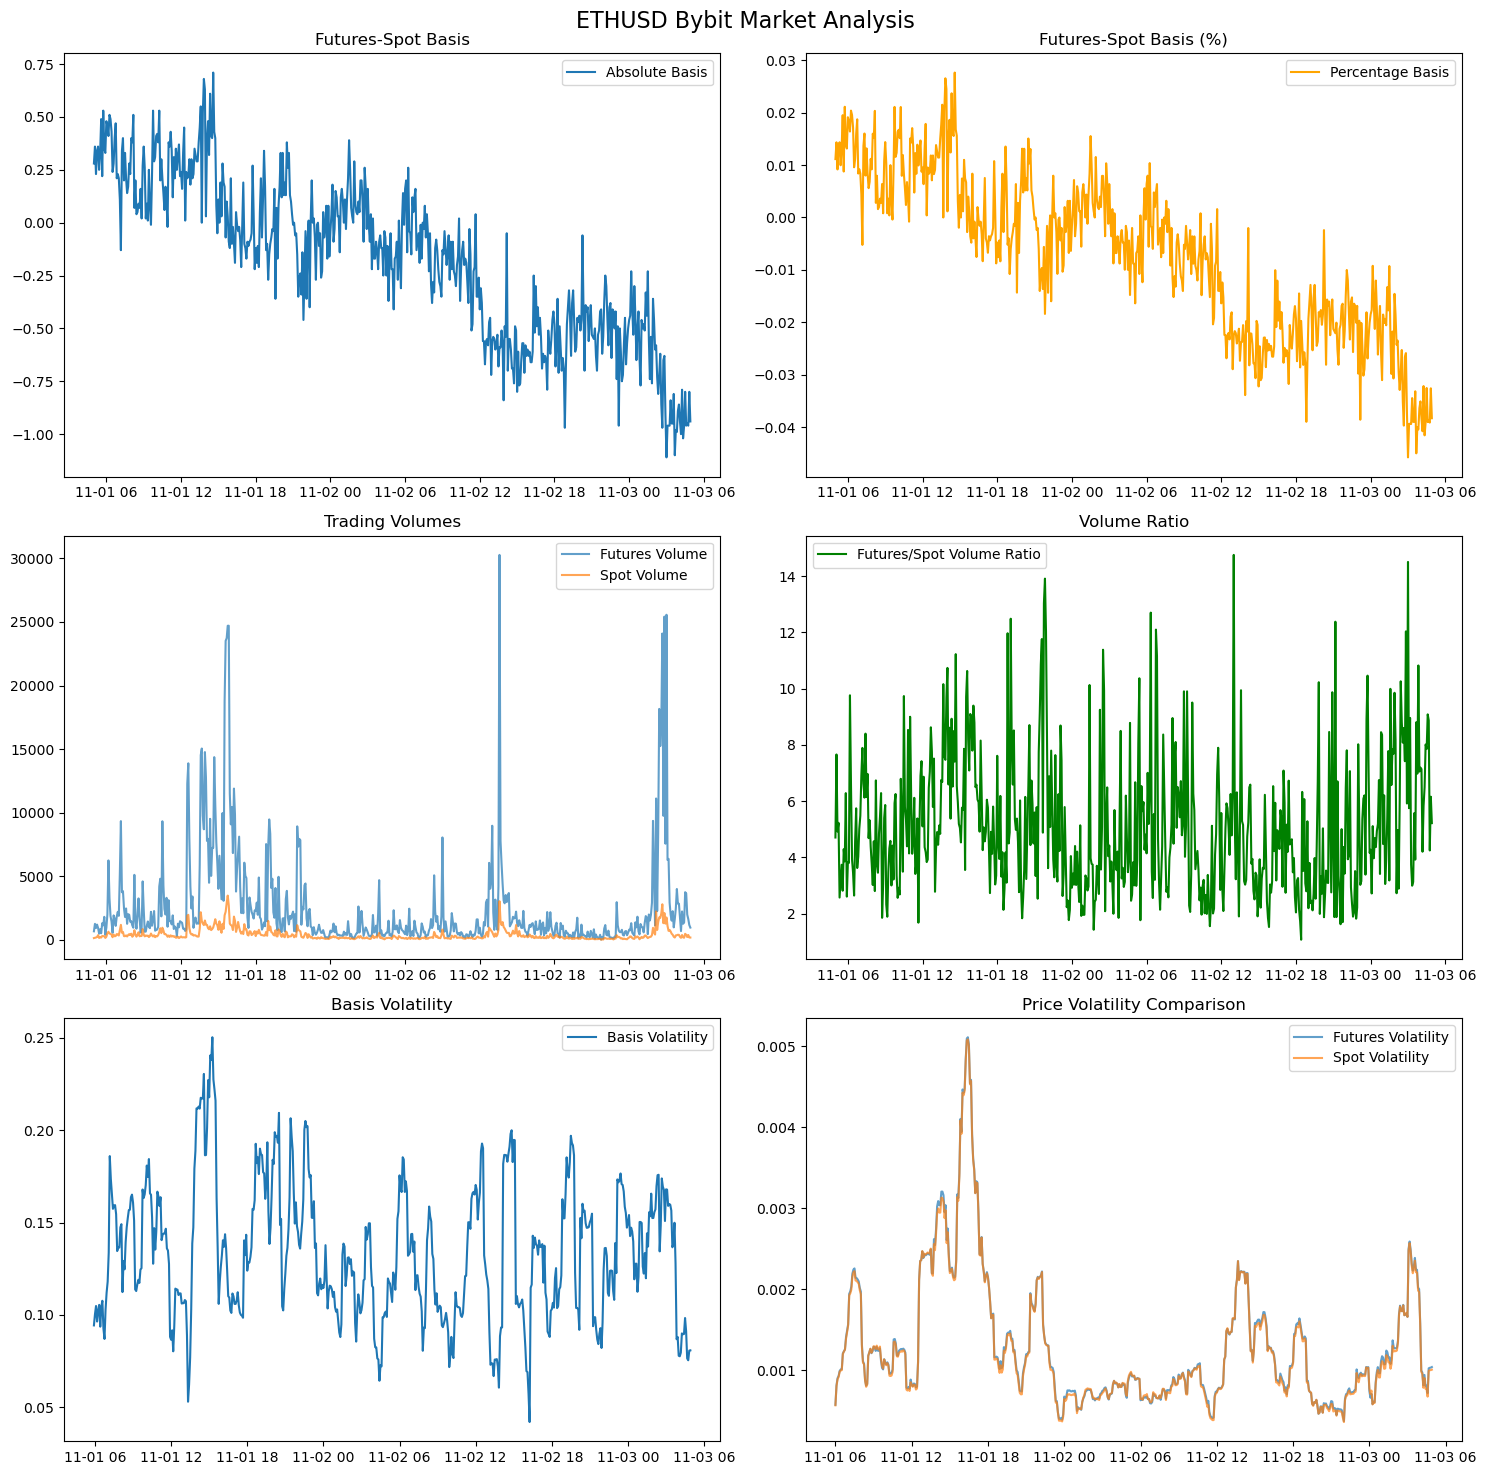


Summary Statistics:
mean_basis: -0.1758
std_basis: 0.3796
max_basis: 0.7100
min_basis: -1.1100
mean_basis_pct: -0.0071
mean_volume_ratio: 5.1104
correlation_volumes: 0.9347
correlation_volatilities: 0.9997

Basis Mean Reversion Test:
Coefficient: -0.1031
P-value: 0.0000

Percentage of potential arbitrage opportunities: 6.60%

Analysis for BTCUSD Bybit market:


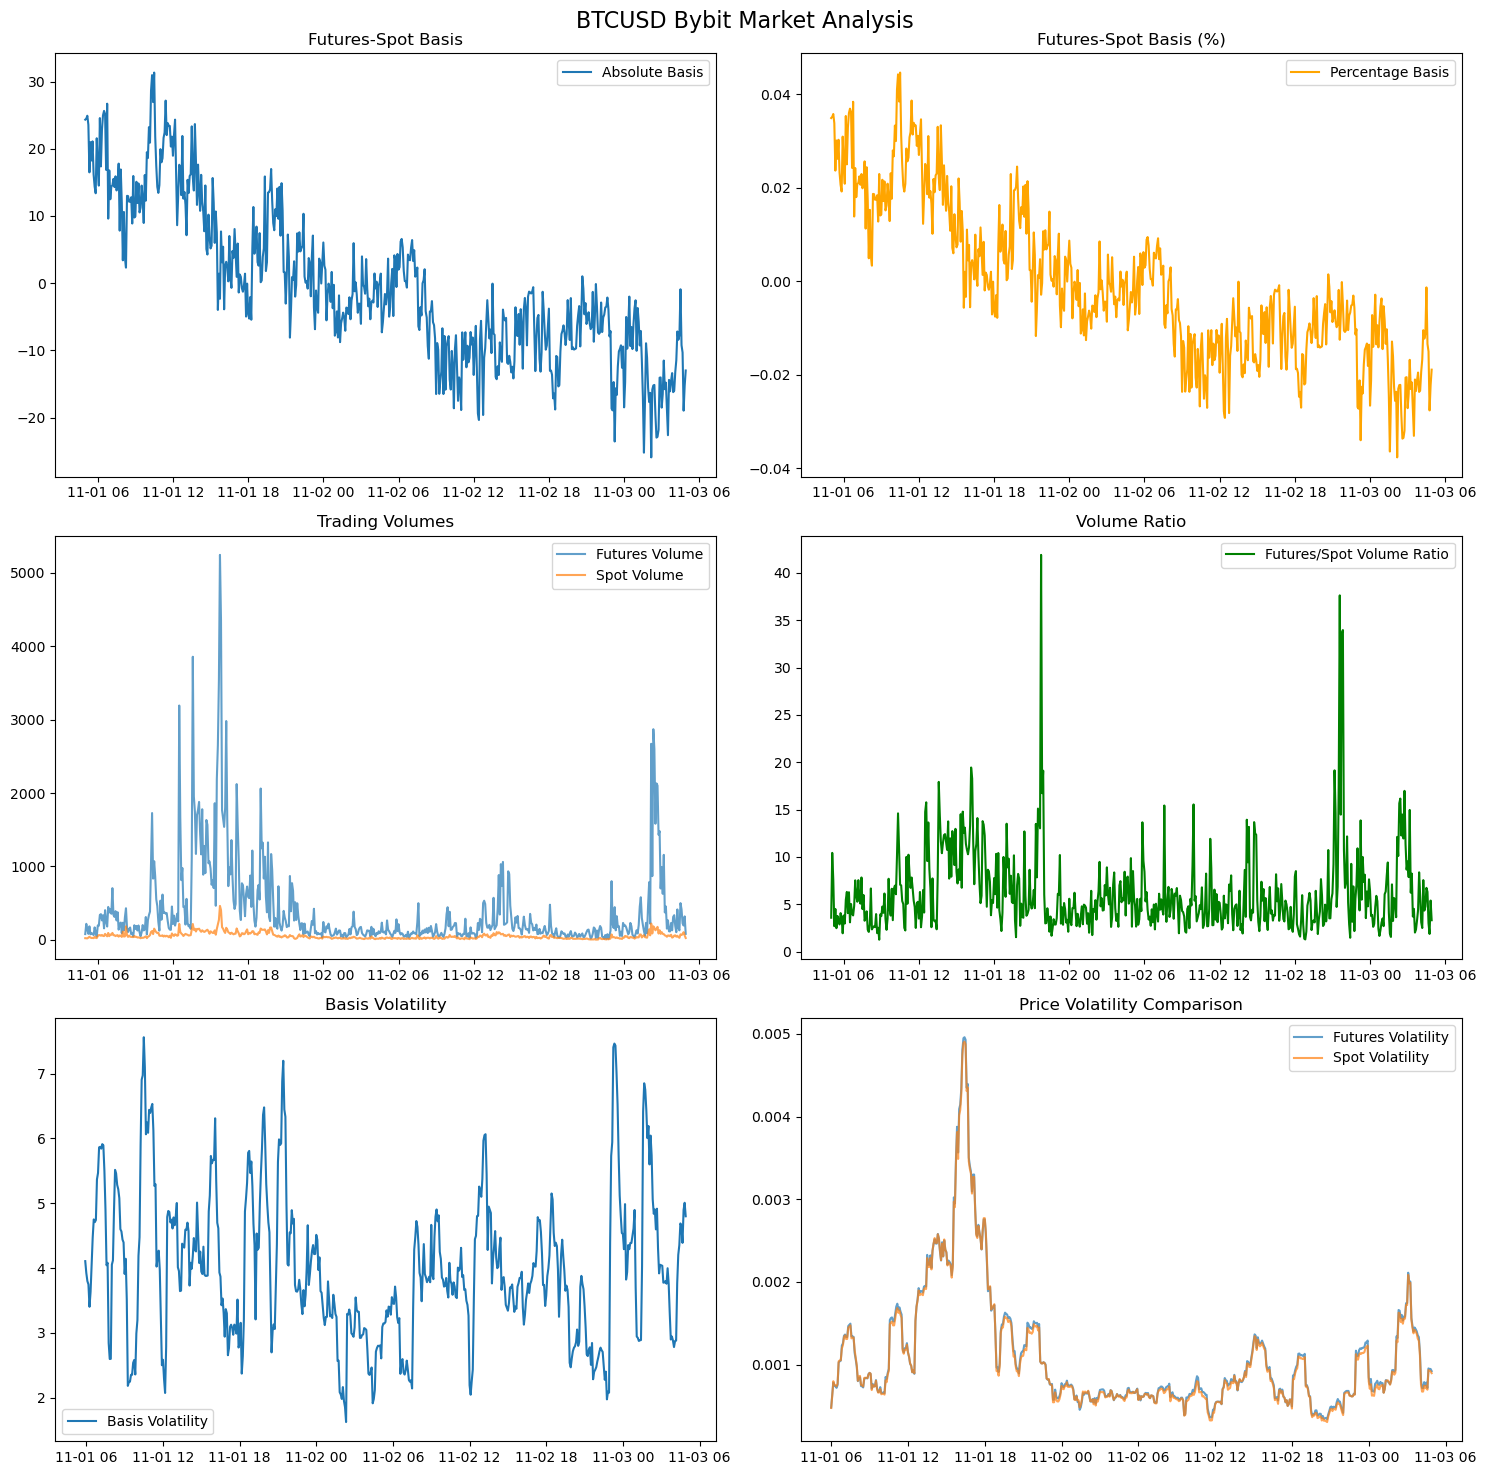


Summary Statistics:
mean_basis: -0.3415
std_basis: 11.3548
max_basis: 31.3300
min_basis: -25.9000
mean_basis_pct: -0.0005
mean_volume_ratio: 6.2367
correlation_volumes: 0.8965
correlation_volatilities: 0.9996

Basis Mean Reversion Test:
Coefficient: -0.0880
P-value: 0.0000

Percentage of potential arbitrage opportunities: 4.86%
{'ETHUSD Binance': {'analysis_df':                      basis  basis_pct  basis_volatility  basis_pct_volatility  \
time                                                                            
2024-11-01 05:00:00   0.06   0.002386               NaN                   NaN   
2024-11-01 05:05:00  -0.10  -0.003982               NaN                   NaN   
2024-11-01 05:10:00   0.15   0.005976               NaN                   NaN   
2024-11-01 05:15:00   0.51   0.020315               NaN                   NaN   
2024-11-01 05:20:00   0.35   0.013946               NaN                   NaN   
...                    ...        ...               ...            

In [17]:
def analyze_futures_market(futures, spot):
    basis = (futures['close'] - spot['close']).rename('basis')
    basis_pct = ((futures['close'] - spot['close']) / spot['close'] * 100).rename('basis_pct')
    
    rolling_window = 12  # 1-hour window (12 * 5min)
    basis_volatility = basis.rolling(rolling_window).std().rename('basis_volatility')
    basis_pct_volatility = basis_pct.rolling(rolling_window).std().rename('basis_pct_volatility')
    
    futures_volume = futures['volume'].rename('futures_volume')
    spot_volume = spot['volume'].rename('spot_volume')
    volume_ratio = (futures['volume'] / spot['volume']).rename('volume_ratio')
    
    futures_returns = np.log(futures['close']).diff()
    spot_returns = np.log(spot['close']).diff()
    futures_volatility = futures_returns.rolling(rolling_window).std().rename('futures_volatility')
    spot_volatility = spot_returns.rolling(rolling_window).std().rename('spot_volatility')
    
    analysis_df = pd.DataFrame({
        'basis': basis,
        'basis_pct': basis_pct,
        'basis_volatility': basis_volatility,
        'basis_pct_volatility': basis_pct_volatility,
        'futures_volume': futures_volume,
        'spot_volume': spot_volume,
        'volume_ratio': volume_ratio,
        'futures_volatility': futures_volatility,
        'spot_volatility': spot_volatility
    })
    
    summary_stats = {
        'mean_basis': basis.mean(),
        'std_basis': basis.std(),
        'max_basis': basis.max(),
        'min_basis': basis.min(),
        'mean_basis_pct': basis_pct.mean(),
        'mean_volume_ratio': volume_ratio.mean(),
        'correlation_volumes': futures_volume.corr(spot_volume),
        'correlation_volatilities': futures_volatility.corr(spot_volatility)
    }
    
    return analysis_df, summary_stats



def plot_analysis(analysis_df, name):
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle(f'{name} Market Analysis', fontsize=16)
    
    axes[0,0].plot(analysis_df.index, analysis_df['basis'], label='Absolute Basis')
    axes[0,0].set_title('Futures-Spot Basis')
    axes[0,0].legend()
    
    axes[0,1].plot(analysis_df.index, analysis_df['basis_pct'], label='Percentage Basis', color='orange')
    axes[0,1].set_title('Futures-Spot Basis (%)')
    axes[0,1].legend()
    
    axes[1,0].plot(analysis_df.index, analysis_df['futures_volume'], label='Futures Volume', alpha=0.7)
    axes[1,0].plot(analysis_df.index, analysis_df['spot_volume'], label='Spot Volume', alpha=0.7)
    axes[1,0].set_title('Trading Volumes')
    axes[1,0].legend()
    
    axes[1,1].plot(analysis_df.index, analysis_df['volume_ratio'], label='Futures/Spot Volume Ratio', color='green')
    axes[1,1].set_title('Volume Ratio')
    axes[1,1].legend()
    
    axes[2,0].plot(analysis_df.index, analysis_df['basis_volatility'], label='Basis Volatility')
    axes[2,0].set_title('Basis Volatility')
    axes[2,0].legend()
    
    axes[2,1].plot(analysis_df.index, analysis_df['futures_volatility'], label='Futures Volatility', alpha=0.7)
    axes[2,1].plot(analysis_df.index, analysis_df['spot_volatility'], label='Spot Volatility', alpha=0.7)
    axes[2,1].set_title('Price Volatility Comparison')
    axes[2,1].legend()
    
    plt.tight_layout()
    plt.show()



def test_mean_reversion(series, lags=1):
    series = series.dropna()
    x = series[:-lags].values  # Previous values
    y = series[lags:].values - series[:-lags].values  # Changes
    return stats.linregress(x, y)

# # Run analysis
# analysis_df, summary_stats = analyze_futures_market(futures, spot)
# plot_analysis(analysis_df)

# # Print summary statistics
# print("\nSummary Statistics:")
# for key, value in summary_stats.items():
#     print(f"{key}: {value:.4f}")

df_list = [
    ethusd_binance_futures, ethusd_binance_spot,
    btcusd_binance_futures, btcusd_binance_spot,
    ethusd_bybit_futures, ethusd_bybit_spot,
    btcusd_bybit_futures, btcusd_bybit_spot
]

pairs = [
    ("ETHUSD Binance", ethusd_binance_futures, ethusd_binance_spot),
    ("BTCUSD Binance", btcusd_binance_futures, btcusd_binance_spot),
    ("ETHUSD Bybit", ethusd_bybit_futures, ethusd_bybit_spot),
    ("BTCUSD Bybit", btcusd_bybit_futures, btcusd_bybit_spot)
]

results = {}

for name, futures, spot in pairs:
    print(f"\nAnalysis for {name} market:")
    
    # Run market analysis
    analysis_df, summary_stats = analyze_futures_market(futures, spot)
    plot_analysis(analysis_df, name)
    
    # Print summary statistics
    print("\nSummary Statistics:")
    for key, value in summary_stats.items():
        print(f"{key}: {value:.4f}")
    
    # Test for mean reversion in basis
    mean_reversion_test = test_mean_reversion(analysis_df['basis'])
    print("\nBasis Mean Reversion Test:")
    print(f"Coefficient: {mean_reversion_test.slope:.4f}")
    print(f"P-value: {mean_reversion_test.pvalue:.4f}")
    
    # Calculate arbitrage opportunities
    basis_threshold = analysis_df['basis_pct'].std() * 2  # 2 standard deviations
    arbitrage_opportunities = (analysis_df['basis_pct'].abs() > basis_threshold).mean()
    print(f"\nPercentage of potential arbitrage opportunities: {arbitrage_opportunities * 100:.2f}%")
    
    # Save results for later use
    results[name] = {
        'analysis_df': analysis_df,
        'summary_stats': summary_stats,
        'mean_reversion_test': mean_reversion_test,
        'arbitrage_opportunities': arbitrage_opportunities
    }

# Results are stored in `results` dictionary for further analysis or export
print(results)

In [18]:
# Test for basis mean-reversion
mean_reversion_test = test_mean_reversion(analysis_df['basis'])
print("\nBasis Mean Reversion Test:")
print(f"Coefficient: {mean_reversion_test.slope:.4f}")
print(f"P-value: {mean_reversion_test.pvalue:.4f}")

# Additional analysis: Market efficiency metrics
print("\nMarket Efficiency Metrics:")
print(f"Basis Autocorrelation (lag 1): {analysis_df['basis'].autocorr(1):.4f}")
print(f"Basis Half-life: {-np.log(2)/mean_reversion_test.slope:.4f} periods")

# Calculate arbitrage opportunities
basis_threshold = analysis_df['basis_pct'].std() * 2  # 2 standard deviations
arbitrage_opportunities = (analysis_df['basis_pct'].abs() > basis_threshold).mean()
print(f"\nPercentage of potential arbitrage opportunities: {arbitrage_opportunities*100:.2f}%")


Basis Mean Reversion Test:
Coefficient: -0.0880
P-value: 0.0000

Market Efficiency Metrics:
Basis Autocorrelation (lag 1): 0.9148
Basis Half-life: 7.8789 periods

Percentage of potential arbitrage opportunities: 4.86%


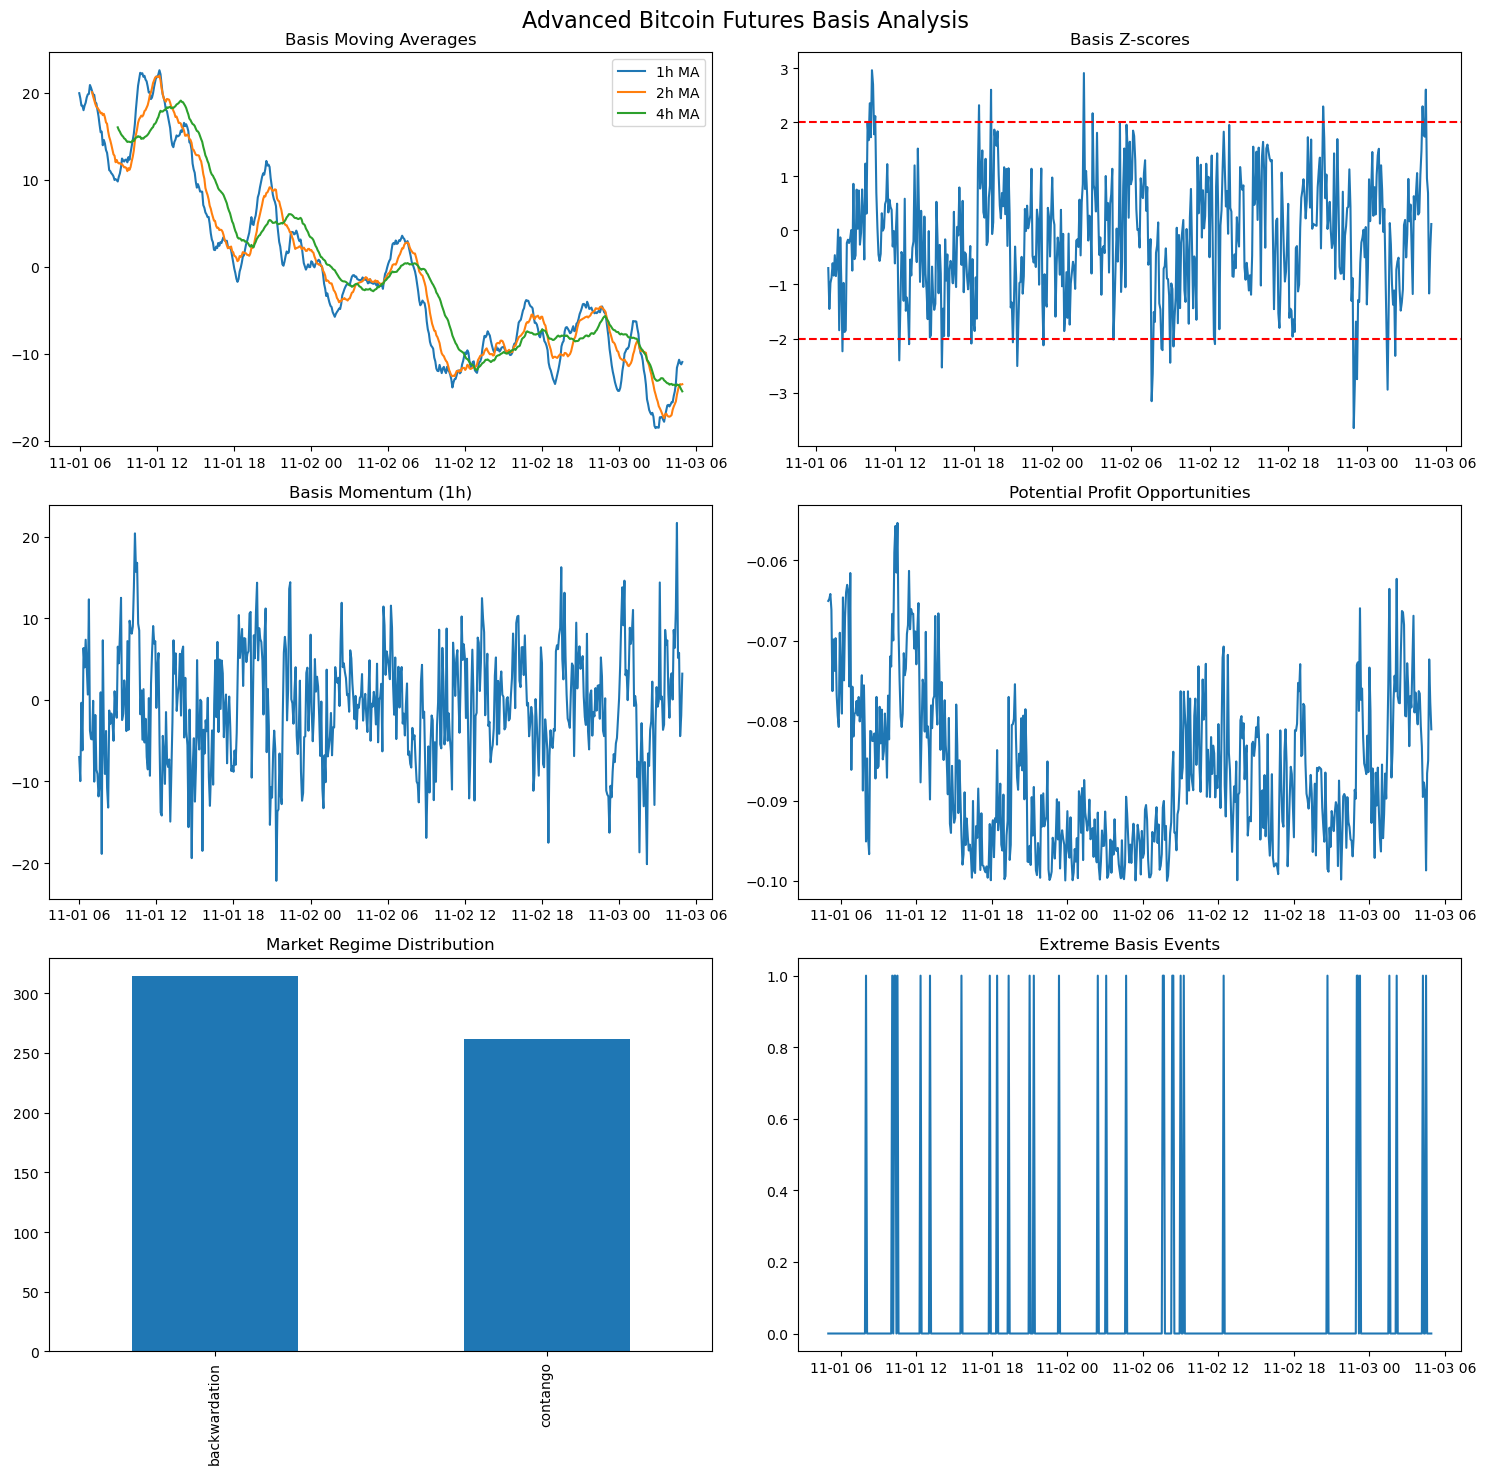


Regime Analysis:
regime_duration:
backwardation    314
contango         262
Name: regime, dtype: int64

regime_changes:
150

contango_profit:
-0.0882218755437803

backwardation_profit:
-0.085486018397725

extreme_events:
False    544
True      32
Name: extreme_basis, dtype: int64

extreme_duration:
1.3291139240506329


Trading Signal Statistics:
mean_signal: -0.0471
signal_volatility: 1.0631
signal_skew: 0.1032
signal_autocorr: 0.2698

Predictive Analysis:
Basis mean reversion strength: 0.5654
Average profit opportunity: -0.0867%
Profit opportunity volatility: 0.0095%


In [19]:
def analyze_basis_patterns(futures, spot):
    # Calculate basic basis metrics
    basis = futures['close'] - spot['close']
    basis_pct = (futures['close'] - spot['close']) / spot['close'] * 100
    
    # Calculate returns
    spot_returns = spot['close'].pct_change()
    futures_returns = futures['close'].pct_change()
    
    # Calculate various timeframe basis metrics
    windows = [12, 24, 48]  # 1-hour, 2-hour, 4-hour
    basis_metrics = pd.DataFrame()
    
    for window in windows:
        basis_metrics[f'basis_ma_{window}'] = basis.rolling(window).mean()
        basis_metrics[f'basis_std_{window}'] = basis.rolling(window).std()
        basis_metrics[f'basis_zscore_{window}'] = (basis - basis.rolling(window).mean()) / basis.rolling(window).std()
    
    # Calculate basis momentum
    basis_metrics['basis_momentum'] = basis - basis.shift(12)  # 1-hour momentum
    
    # Calculate basis regime changes
    basis_metrics['regime'] = np.where(basis > basis.rolling(24).mean(), 'contango', 'backwardation')
    
    # Calculate basis CrossOvers
    basis_metrics['basis_ma_crossover'] = np.sign(basis_metrics['basis_ma_12'] - basis_metrics['basis_ma_24']).diff()
    
    # Identify extreme basis events
    zscore_threshold = 2
    basis_metrics['extreme_basis'] = np.abs(basis_metrics['basis_zscore_24']) > zscore_threshold
    
    # Calculate profit opportunities
    basis_metrics['potential_profit'] = np.abs(basis_pct) - 0.1  # Assuming 0.1% transaction cost
    
    return basis_metrics

def analyze_basis_regimes(basis_metrics, basis):
    # Calculate regime statistics
    regime_stats = pd.DataFrame()
    
    # Duration of regimes
    regime_duration = basis_metrics['regime'].value_counts()
    regime_changes = (basis_metrics['regime'] != basis_metrics['regime'].shift(1)).sum()
    
    # Profitability in different regimes
    contango_profit = basis_metrics[basis_metrics['regime'] == 'contango']['potential_profit'].mean()
    backwardation_profit = basis_metrics[basis_metrics['regime'] == 'backwardation']['potential_profit'].mean()
    
    # Extreme events analysis
    extreme_events = basis_metrics['extreme_basis'].value_counts()
    extreme_duration = basis_metrics['extreme_basis'].rolling(24).sum().mean()
    
    return {
        'regime_duration': regime_duration,
        'regime_changes': regime_changes,
        'contango_profit': contango_profit,
        'backwardation_profit': backwardation_profit,
        'extreme_events': extreme_events,
        'extreme_duration': extreme_duration
    }

def plot_basis_analysis(basis_metrics, basis):
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle('Advanced Bitcoin Futures Basis Analysis', fontsize=16)
    
    # Plot 1: Basis Moving Averages
    axes[0,0].plot(basis_metrics['basis_ma_12'], label='1h MA')
    axes[0,0].plot(basis_metrics['basis_ma_24'], label='2h MA')
    axes[0,0].plot(basis_metrics['basis_ma_48'], label='4h MA')
    axes[0,0].set_title('Basis Moving Averages')
    axes[0,0].legend()
    
    # Plot 2: Basis Z-scores
    axes[0,1].plot(basis_metrics['basis_zscore_24'], label='2h Z-score')
    axes[0,1].axhline(y=2, color='r', linestyle='--')
    axes[0,1].axhline(y=-2, color='r', linestyle='--')
    axes[0,1].set_title('Basis Z-scores')
    
    # Plot 3: Basis Momentum
    axes[1,0].plot(basis_metrics['basis_momentum'])
    axes[1,0].set_title('Basis Momentum (1h)')
    
    # Plot 4: Potential Profit Opportunities
    axes[1,1].plot(basis_metrics['potential_profit'])
    axes[1,1].set_title('Potential Profit Opportunities')
    
    # Plot 5: Regime Distribution
    basis_metrics['regime'].value_counts().plot(kind='bar', ax=axes[2,0])
    axes[2,0].set_title('Market Regime Distribution')
    
    # Plot 6: Extreme Events
    axes[2,1].plot(basis_metrics['extreme_basis'])
    axes[2,1].set_title('Extreme Basis Events')
    
    plt.tight_layout()
    plt.show()

def calculate_trading_signals(basis_metrics):
    signals = pd.DataFrame(index=basis_metrics.index)
    
    # Generate trading signals
    signals['ma_cross_signal'] = np.sign(basis_metrics['basis_ma_crossover'])
    signals['zscore_signal'] = np.where(basis_metrics['basis_zscore_24'] < -2, 1, 
                                      np.where(basis_metrics['basis_zscore_24'] > 2, -1, 0))
    signals['momentum_signal'] = np.sign(basis_metrics['basis_momentum'])
    
    # Combine signals
    signals['combined_signal'] = (signals['ma_cross_signal'] + 
                                signals['zscore_signal'] + 
                                signals['momentum_signal'])
    
    # Calculate signal statistics
    signal_stats = {
        'mean_signal': signals['combined_signal'].mean(),
        'signal_volatility': signals['combined_signal'].std(),
        'signal_skew': signals['combined_signal'].skew(),
        'signal_autocorr': signals['combined_signal'].autocorr()
    }
    
    return signals, signal_stats

# Run analysis
basis_metrics = analyze_basis_patterns(futures, spot)
regime_analysis = analyze_basis_regimes(basis_metrics, futures['close'] - spot['close'])
signals, signal_stats = calculate_trading_signals(basis_metrics)

# Plot results
plot_basis_analysis(basis_metrics, futures['close'] - spot['close'])

# Print analysis results
print("\nRegime Analysis:")
for key, value in regime_analysis.items():
    print(f"{key}:")
    print(value)
    print()

print("\nTrading Signal Statistics:")
for key, value in signal_stats.items():
    print(f"{key}: {value:.4f}")

# Calculate predictive metrics
print("\nPredictive Analysis:")
print(f"Basis mean reversion strength: {basis_metrics['basis_zscore_24'].autocorr():.4f}")
print(f"Average profit opportunity: {basis_metrics['potential_profit'].mean():.4f}%")
print(f"Profit opportunity volatility: {basis_metrics['potential_profit'].std():.4f}%")

## Correlation between exchanges: Average of 0.77 correlation ,indicating space for arbitrage

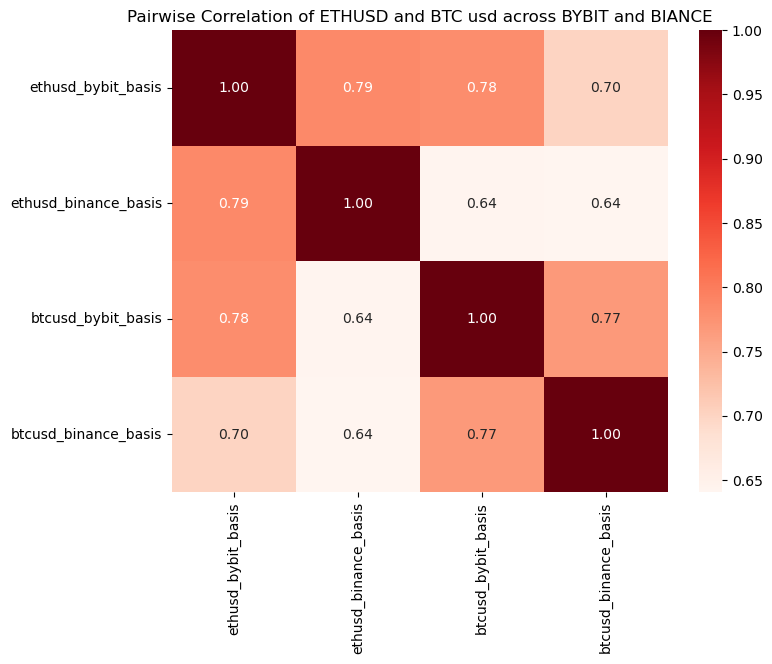

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "ethusd_bybit_basis": ethusd_bybit_basis.values,
    "ethusd_binance_basis": ethusd_binance_basis.values,
    "btcusd_bybit_basis": btcusd_bybit_basis.values,
    "btcusd_binance_basis": btcusd_binance_basis.values,
}

basis_df = pd.DataFrame(data, index=ethusd_bybit_basis.index)

# Compute the pairwise correlation matrix
correlation_matrix = basis_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", cbar=True, fmt=".2f")
plt.title("Pairwise Correlation of ETHUSD and BTC usd across BYBIT and BIANCE")
plt.show()



## TS Analysis


In [81]:
def TS_analysis(basis_diff, name):

    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.stattools import adfuller

    def test_stationarity(series, CI = 0.1):
        adf_test = adfuller(series)
        print("ADF Statistic:", adf_test[0])
        print("p-value:", adf_test[1])
        print("Critical Values:")
        for key, value in adf_test[4].items():
            print(f"   {key}: {value}")

        if adf_test[1] <= CI:
            print(f"{name} series is stationary at {CI*100}% confidence level (reject the null hypothesis).")
        else:
            print(f"{name} series is not stationary.")

    test_stationarity(basis_diff)

    # Plot ACF and PACF
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 1, 1)
    plot_acf(basis_diff, lags=50, ax=plt.gca())
    plt.title(f"Autocorrelation Function (ACF) of {name}")

    plt.subplot(2, 1, 2)
    plot_pacf(basis_diff, lags=50, ax=plt.gca(), method='ywmle')
    plt.title(f"Partial Autocorrelation Function (PACF) of {name}")

    plt.tight_layout()
    plt.show()

    # Fit an AR model 
    ar_model = ARIMA(basis_diff, order=(2, 0, 0))
    ar_model_fit = ar_model.fit()

    print(ar_model_fit.summary())

    plt.figure(figsize=(15, 6))
    plt.plot(basis_diff, label="Actual Data", alpha=0.7)
    plt.plot(ar_model_fit.fittedvalues, label="Fitted Values (AR(2))", color="red")
    plt.title(f"AR(2) Model Fit for {name}")
    plt.xlabel("Time")
    plt.ylabel(f"{name}_basis_diff")
    plt.legend()
    plt.grid(True)
    plt.show()


### ETH

Gradual Decline in ACF & Obvious Cut-off in PACF ——> More of a AR process,However, ETHUSD basis diff across exchange show less of stationarity (staionary at 10% CI level)

ADF Statistic: -2.7447628130922155
p-value: 0.06660744147724695
Critical Values:
   1%: -3.441956369604407
   5%: -2.8666599744723045
   10%: -2.5694967895716014
ETHUSD series is stationary at 10.0% confidence level (reject the null hypothesis).


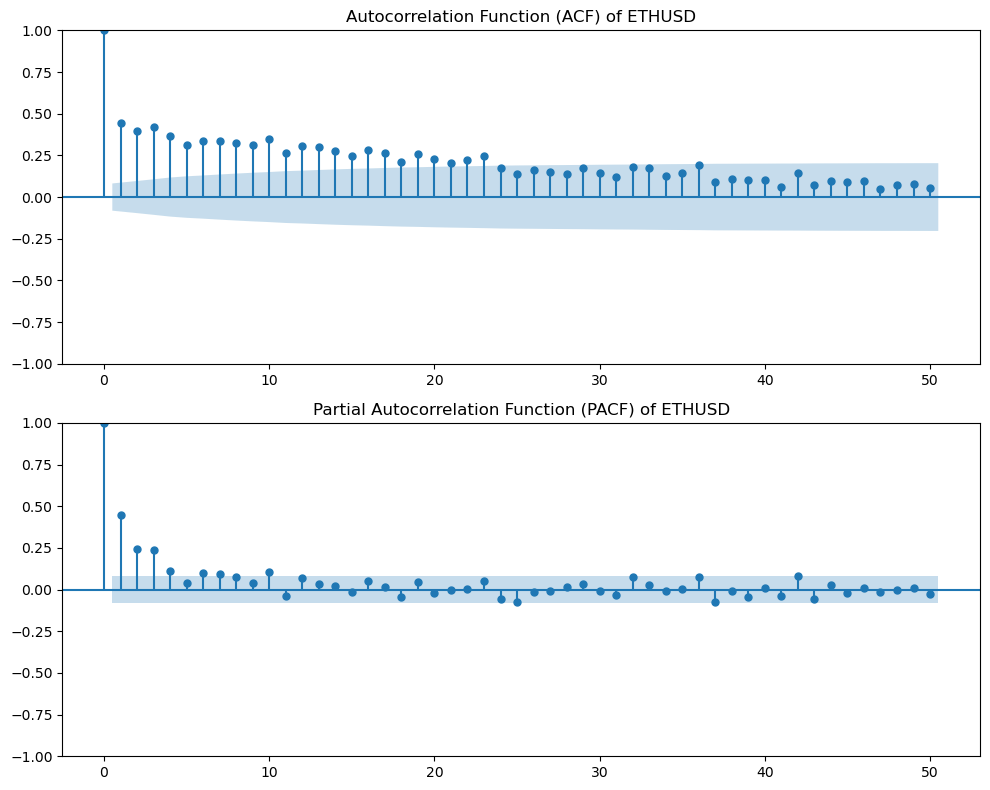

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  576
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  89.666
Date:                Thu, 05 Dec 2024   AIC                           -171.332
Time:                        15:21:42   BIC                           -153.908
Sample:                             0   HQIC                          -164.537
                                - 576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0544      0.021     -2.608      0.009      -0.095      -0.014
ar.L1          0.3364      0.043      7.828      0.000       0.252       0.421
ar.L2          0.2490      0.039      6.390      0.0

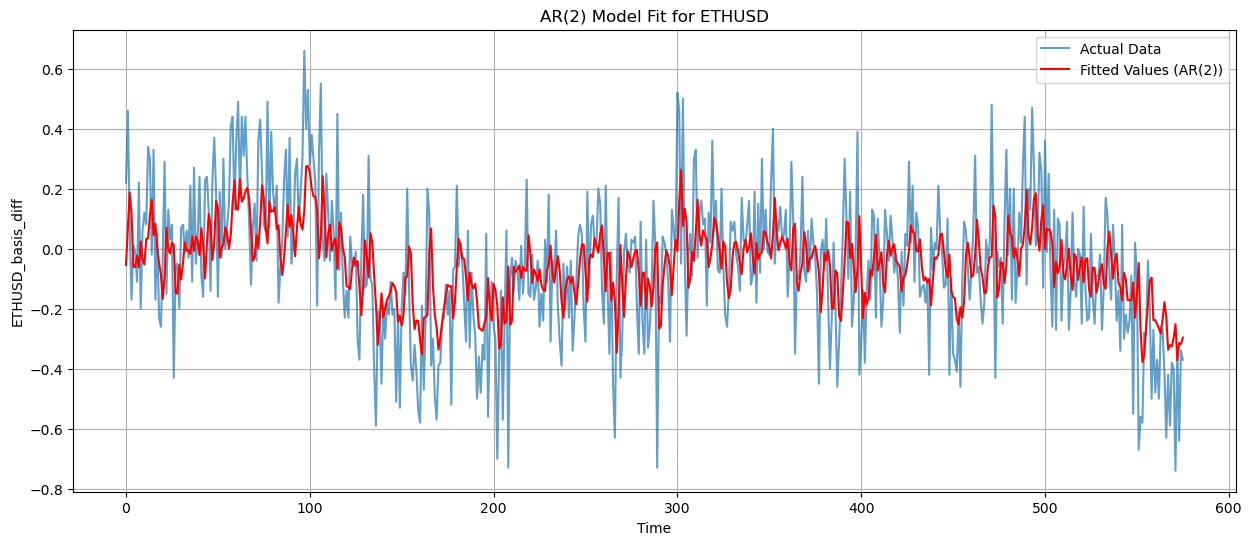

In [106]:

ethusd_basis_diff = (ethusd_bybit_basis-ethusd_binance_basis).values
TS_analysis(ethusd_basis_diff, 'ETHUSD')

### BTC

Gradual Decline in ACF & Obvious Cut-off in PACF ——> More of a AR process

BTCUSD is stationary at 1% CI level. Might need more data for ETHUSD to check the stationarity.

ADF Statistic: -5.063872919768788
p-value: 1.6563660551759013e-05
Critical Values:
   1%: -3.441874550188182
   5%: -2.8666239496633246
   10%: -2.569477593105571
BTCUSD series is stationary at 10.0% confidence level (reject the null hypothesis).


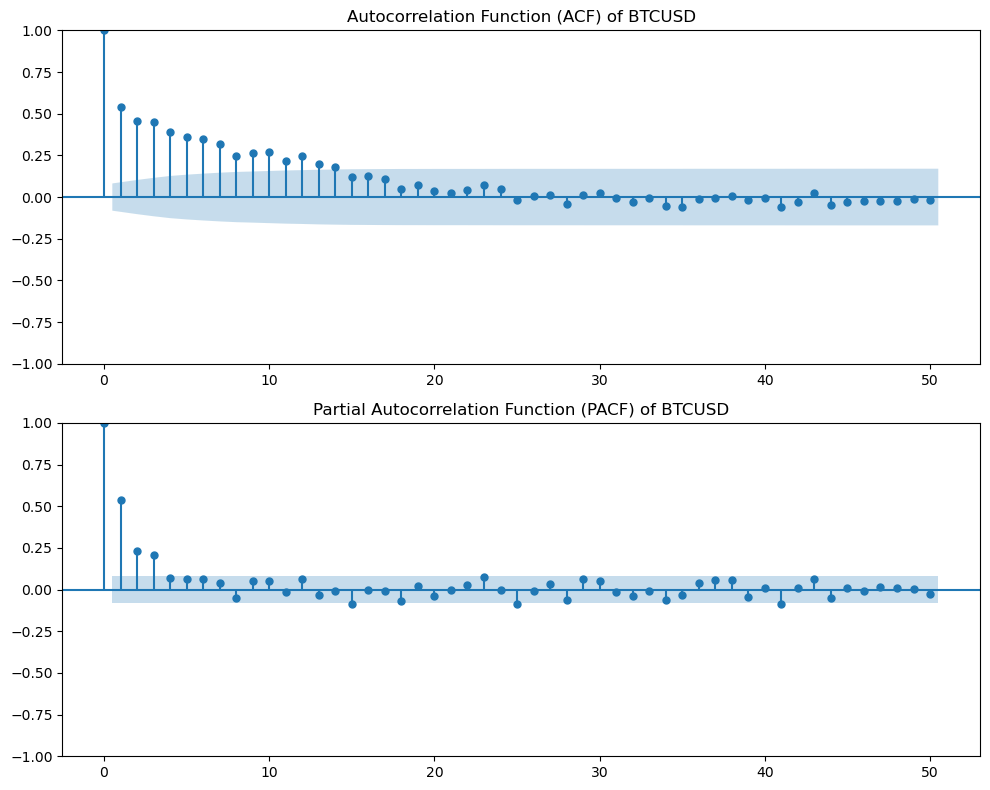

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  576
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1870.664
Date:                Thu, 05 Dec 2024   AIC                           3749.328
Time:                        15:21:46   BIC                           3766.752
Sample:                             0   HQIC                          3756.123
                                - 576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1106      0.732     -5.619      0.000      -5.544      -2.677
ar.L1          0.4123      0.042      9.704      0.000       0.329       0.496
ar.L2          0.2317      0.041      5.642      0.0

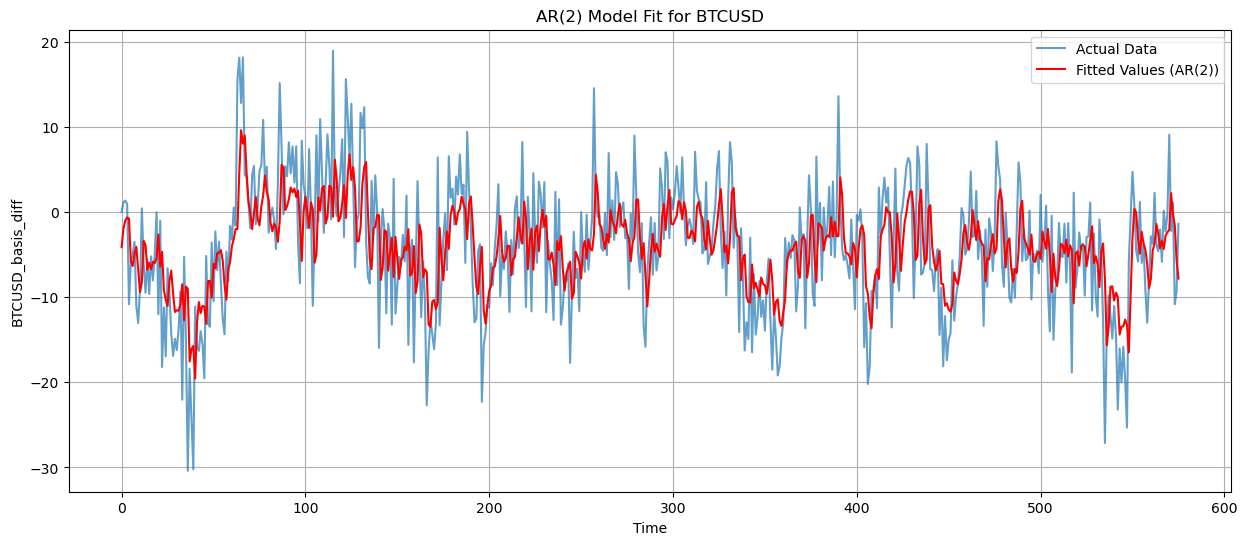

In [107]:
btcusd_basis_diff = (btcusd_bybit_basis-btcusd_binance_basis).values
TS_analysis(btcusd_basis_diff, 'BTCUSD')


## Regression Analysis
Try to relate the basis diff with other variables such as cross-sectional volume: Found that there's indeed an statistically significant impact on that.


In [112]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def regression_analysis(name):
# Y: Basis @ bybit - Basis @ binance 
# X: 
    if name == 'ETHUSD':
        bybit_futures_volume = (ethusd_bybit_futures['volume']).values
        binance_futures_volume = (ethusd_binance_futures['volume']).values
        basis_diff = (ethusd_bybit_basis-ethusd_binance_basis).values
        volume_diff = (ethusd_bybit_futures['volume']-ethusd_bybit_spot['volume'])-(ethusd_binance_futures['volume']-ethusd_binance_spot['volume']).values
        # ethusd_basis_diff_lag1 = (ethusd_bybit_basis-ethusd_binance_basis).shift(1)
        # ethusd_basis_diff_lag2 = (ethusd_bybit_basis-ethusd_binance_basis).shift(2)
        # ethusd_futures_price_diff_lag1 = (ethusd_bybit_futures['close']- ethusd_binance_futures['close']).shift(1).values
        # ethusd_spot_price_diff_lag1 = (ethusd_bybit_spot['close']- ethusd_binance_spot['close']).shift(1).values
        # log_abs_ethusd_volume_diff = np.log(((ethusd_bybit_futures['volume']-ethusd_bybit_spot['volume'])-(ethusd_binance_futures['volume']-ethusd_binance_spot['volume'])).abs()).values
        # log_abs_ethusd_volume_sum = np.log(((ethusd_bybit_futures['volume']-ethusd_bybit_spot['volume'])+(ethusd_binance_futures['volume']-ethusd_binance_spot['volume'])).abs()).values
        # log_bybit_futures_volume = np.log(ethusd_bybit_futures['volume']).values
    elif name == 'BTCUSD':
        bybit_futures_volume = (btcusd_bybit_futures['volume']).values
        binance_futures_volume = (btcusd_binance_futures['volume']).values
        basis_diff = (btcusd_bybit_basis-btcusd_binance_basis).values
        volume_diff = (btcusd_bybit_futures['volume']-btcusd_bybit_spot['volume'])-(btcusd_binance_futures['volume']-btcusd_binance_spot['volume']).values




    y = basis_diff
    X =  pd.DataFrame({
            "volume_diff": volume_diff,
            "bybit_futures_volume": bybit_futures_volume,
            "binance_futures_volume":binance_futures_volume,
            # "log_abs_volume_diff": log_abs_ethusd_volume_diff,
            # "log_abs_volume_sum":log_abs_ethusd_volume_sum,
            # "ethusd_futures_price_diff_lag1": ethusd_futures_price_diff_lag1,
            # "ethusd_spot_price_diff_lag1":ethusd_spot_price_diff_lag1,
            # "ethusd_basis_diff_lag1": ethusd_basis_diff_lag1,
            # "ethusd_basis_diff_lag2": ethusd_basis_diff_lag2,        
        })

    # Extend X with an additional feature
    X_extended = sm.add_constant(X[['volume_diff', 'bybit_futures_volume','binance_futures_volume']])
    # X_extended = X_extended[1:] #drop nan
    # y = y[1:] #control same length btw y and X


    model_extended = sm.OLS(y, X_extended).fit()
    print(model_extended.summary())

    # Plot the frequency distributions (histograms) of y and the two features
    plt.figure(figsize=(12, 8))

    # Histogram for y (ethusd_basis_diff)
    plt.subplot(3, 1, 1)
    plt.hist(basis_diff, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title("Distribution of Basis Diff (y)")
    plt.xlabel("Basis Diff")
    plt.ylabel("Frequency")

    # Histogram for volume_diff
    plt.subplot(3, 1, 2)
    plt.hist(volume_diff, bins=30, color="orange", edgecolor="black", alpha=0.7)
    plt.title("Distribution of Volume Diff (Feature 1)")
    plt.xlabel("Volume Diff")
    plt.ylabel("Frequency")


    # Histogram for bybit_futures_volume
    plt.subplot(3, 1, 3)
    plt.hist(bybit_futures_volume, bins=30, color="green", edgecolor="black", alpha=0.7)
    plt.title("Distribution of Bybit Futures Volume (Feature 2)")
    plt.xlabel("Bybit Futures Volume")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()
    

    # Scatter plot for the relationship between y and the main features
    # plt.figure(figsize=(12, 6))

    # plt.scatter(ethusd_volume_diff, ethusd_basis_diff, alpha=0.7, label='Volume Diff vs Basis Diff', color='blue')

    # plt.scatter(bybit_futures_volume, ethusd_basis_diff, alpha=0.7, label='Bybit Futures Volume vs Basis Diff', color='red')

    # plt.title('Scatter Plots of Features vs Basis Diff')
    # plt.xlabel('Feature Values')
    # plt.ylabel('Basis Diff')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


### ETH

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     15.10
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.80e-09
Time:                        15:25:03   Log-Likelihood:                 29.657
No. Observations:                 576   AIC:                            -51.31
Df Residuals:                     572   BIC:                            -33.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

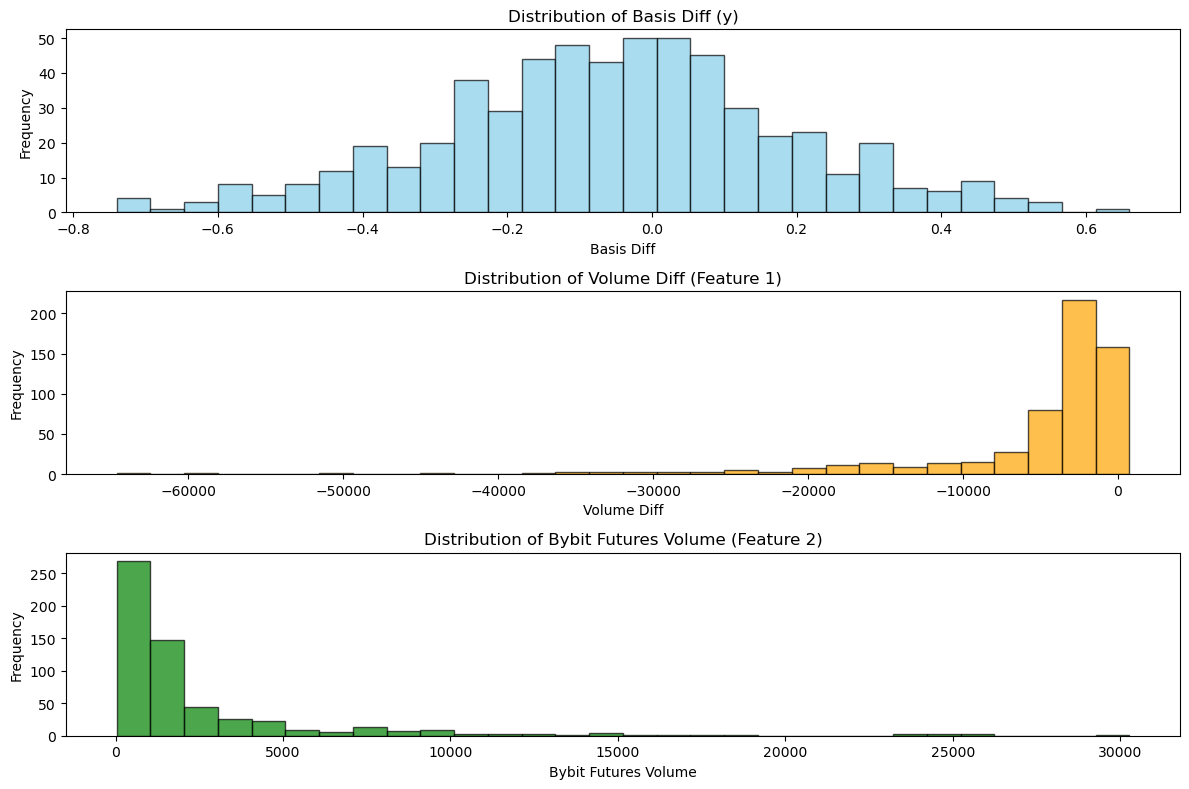

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


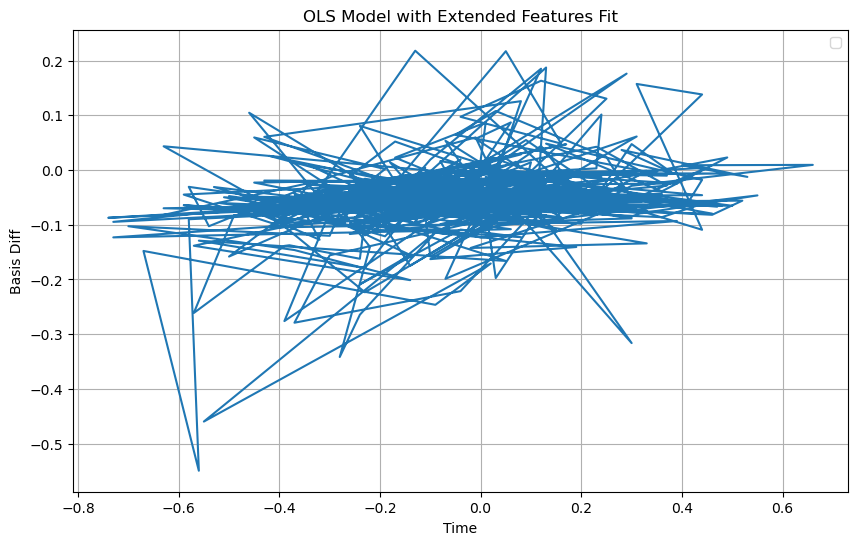

In [111]:
regression_analysis('ETHUSD')

### BTC

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.779
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           0.000170
Time:                        15:19:19   Log-Likelihood:                -1974.7
No. Observations:                 576   AIC:                             3957.
Df Residuals:                     572   BIC:                             3975.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4

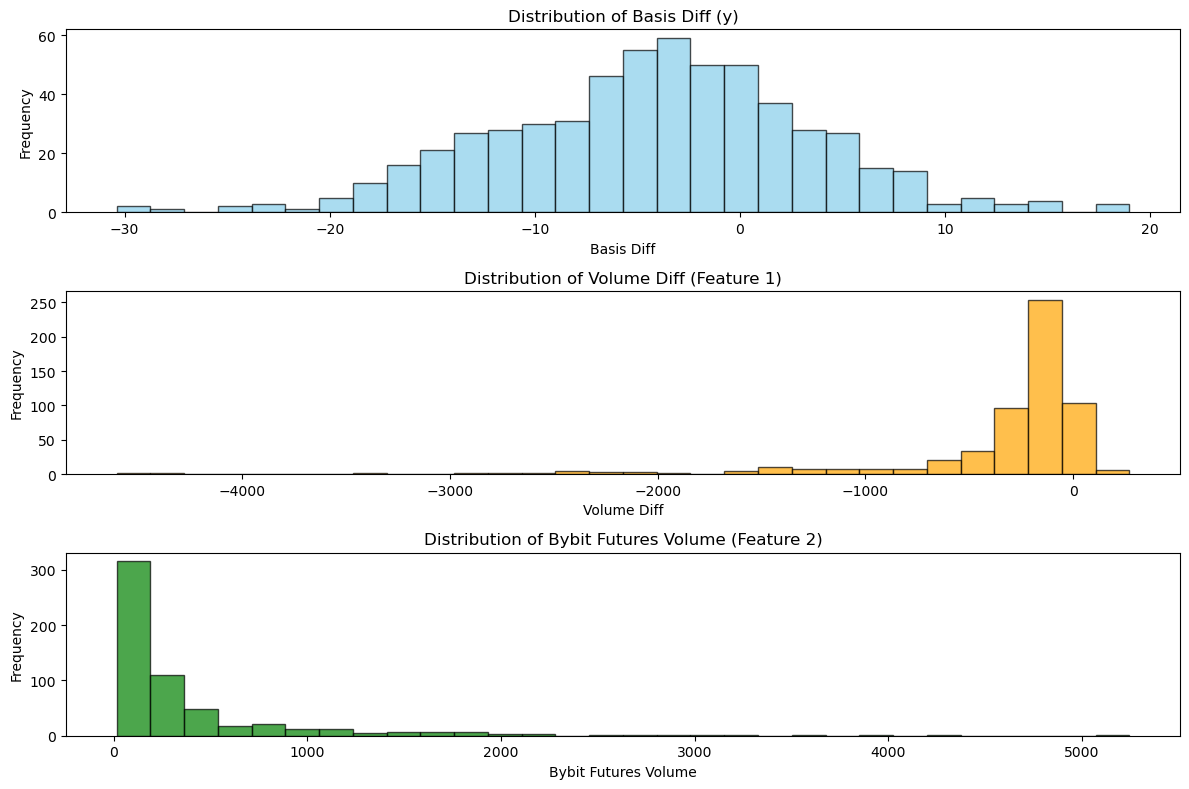

In [105]:
regression_analysis('BTCUSD')